In [128]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# to be used a prefix for all files
path_prefix = "/content/drive/...

Mounted at /content/drive


Importing pandas and mathplotlib

In [129]:
import pandas as pd  # an alias for pandas
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

In [130]:
filename = "Stock Market Dataset.csv"

fname = "US_inflation_rates.csv"

df_prices = pd.read_csv(join(path_prefix, filename), dayfirst=True)

df_cpi = pd.read_csv(join(path_prefix, fname), dayfirst=True)

# Data Check

In [131]:
df_prices

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1238,08-02-2019,2.583,147880.0,52.72,621000.0,2.8140,270.0,"3,661.70",699230.0,...,"3,00,771",240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,"1,318.50",150610.0
1239,1239,07-02-2019,2.551,211790.0,52.64,749010.0,2.8320,320.0,"3,397.70",471360.0,...,"3,02,813",240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,"1,314.20",166760.0
1240,1240,06-02-2019,2.662,98330.0,54.01,606720.0,2.8400,100.0,"3,404.30",514210.0,...,"3,08,810",120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,"1,314.40",137250.0
1241,1241,05-02-2019,2.662,82250.0,53.66,609760.0,2.8205,90.0,"3,468.40",460950.0,...,"3,10,700",360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,"1,319.20",129010.0


In [132]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   float64
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   float64
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   object 
 16  Nasdaq_100_Vol.    1242 

In [133]:
df_cpi

,date,value
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
913,2023-02-01,301.648
914,2023-03-01,301.808
915,2023-04-01,302.918
916,2023-05-01,303.294


In [134]:
df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    918 non-null    object 
 1   value   918 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.5+ KB


# **Data Editing**

In [135]:
df_prices = df_prices[["Date","Microsoft_Price","Gold_Price"]]
df_prices['Gold_Price'] = df_prices['Gold_Price'].str.replace(',','').astype(np.float64)

<ipython-input-135-50562f0a1bf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices['Gold_Price'] = df_prices['Gold_Price'].str.replace(',','').astype(np.float64)


In [136]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'], dayfirst=True)
df_prices = df_prices.groupby(pd.Grouper(key='Date', freq='M')).mean()
df_prices = df_prices.loc[:'2023-06-30']

<ipython-input-136-41de81809fbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices['Date'] = pd.to_datetime(df_prices['Date'], dayfirst=True)


In [137]:
df_cpi = df_cpi.iloc[865:]
df_cpi = df_cpi.sort_index(ascending = True)
df_cpi = df_cpi.set_index('date')
df_cpi.head()


,value
date,
2019-02-01,253.322
2019-03-01,254.202
2019-04-01,255.211
2019-05-01,255.290
2019-06-01,255.159


# Plot Scattering

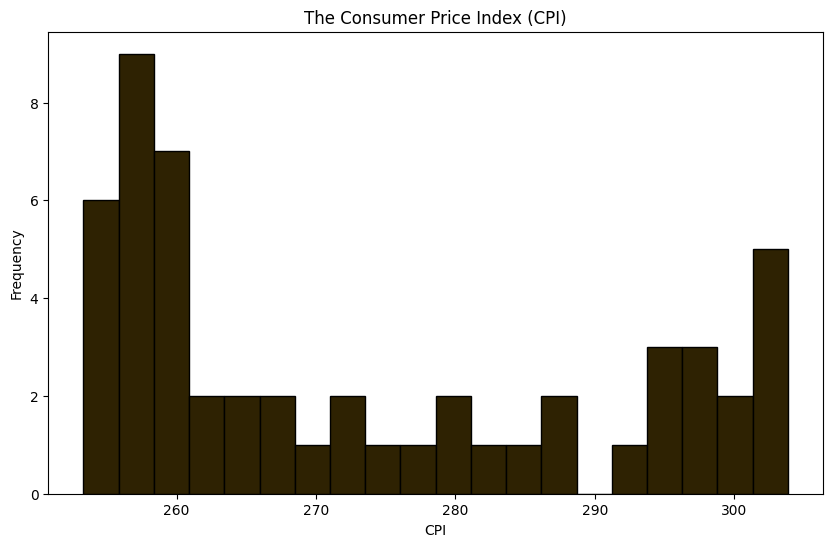

In [138]:
plt.figure(figsize=(10, 6))
plt.hist(df_cpi['value'], bins=20, color='#2E2202', edgecolor='black')
plt.title('The Consumer Price Index (CPI)')
plt.xlabel('CPI')
plt.ylabel('Frequency')
#plt.grid(True)
plt.show()

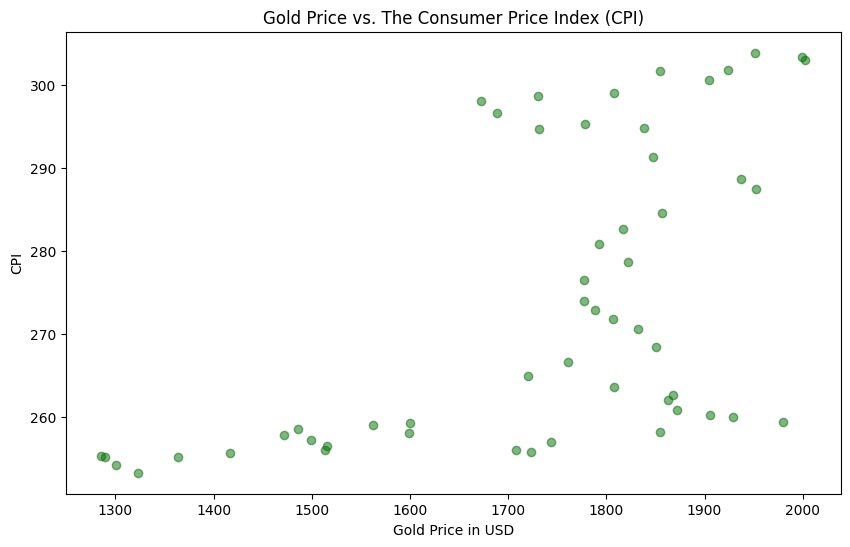

In [139]:

plt.figure(figsize=(10, 6))
plt.scatter(df_prices['Gold_Price'], df_cpi['value'], color='#036B05', alpha=0.5)
plt.title('Gold Price vs. The Consumer Price Index (CPI)')
plt.xlabel('Gold Price in USD')
plt.ylabel('CPI')
#plt.grid(True)
plt.show()


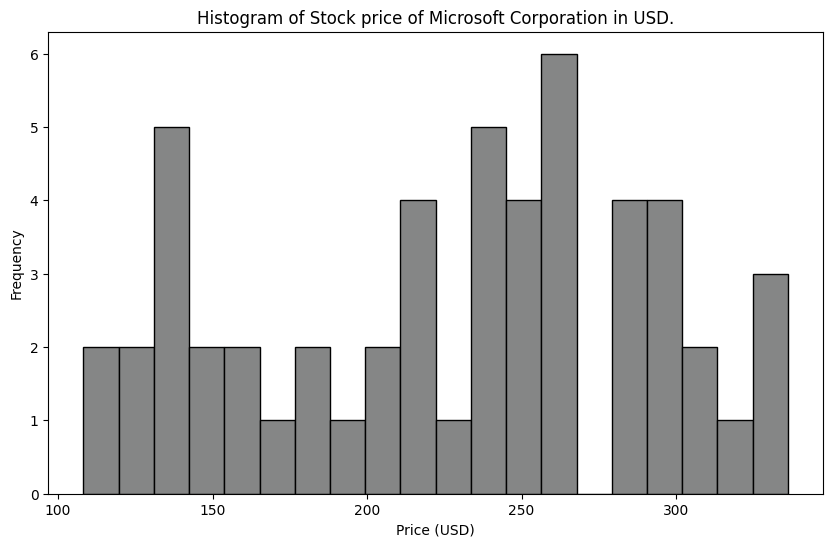

In [140]:
plt.figure(figsize=(10, 6))
plt.hist(df_prices['Microsoft_Price'], bins=20, color='#858686', edgecolor='black')
plt.title('Histogram of Stock price of Microsoft Corporation in USD.')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
#plt.grid(True)
plt.show()


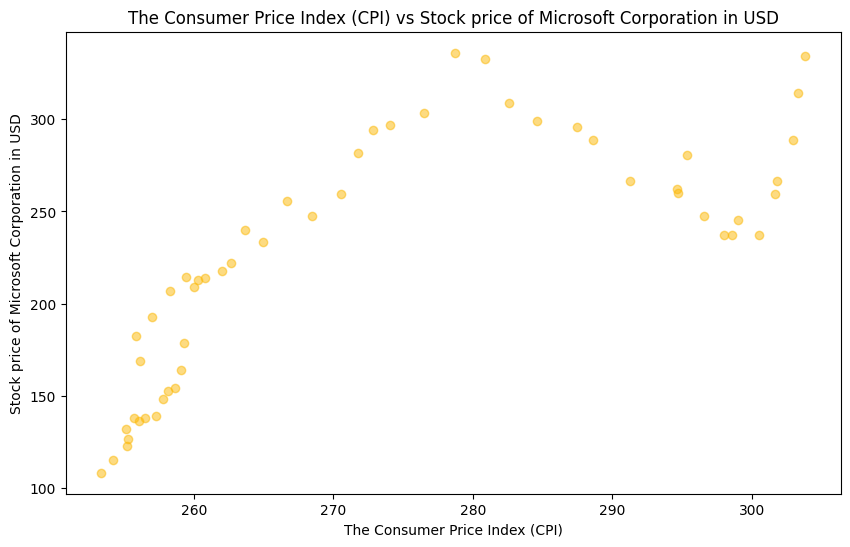

In [141]:
plt.figure(figsize = (10,6))
plt.scatter(df_cpi['value'], df_prices['Microsoft_Price'], color = '#FCB805', alpha=0.5 )
plt.title("The Consumer Price Index (CPI) vs Stock price of Microsoft Corporation in USD")
plt.xlabel('The Consumer Price Index (CPI)')
plt.ylabel('Stock price of Microsoft Corporation in USD')
plt.show()



# Corrolation

**Hypothesis testing - CPI - Microsoft Stock Price**

In [142]:
correlation, p_value = stats.pearsonr(df_cpi['value'], df_prices['Microsoft_Price'])


# Set significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis (H0): There is a statistically significant linear relationship between CPI and stock price.")
else:
    print("Fail to reject null hypothesis (H0): Insufficient evidence for a statistically significant linear relationship.")

Reject null hypothesis (H0): There is a statistically significant linear relationship between CPI and stock price.


**Linear Regression Model**

## CPI- Microsoft Stock Price

In [143]:
X = df_cpi[['value']]  # Assuming CPI is the independent variable
y = df_prices['Microsoft_Price']  # Dependent variable
y = y.fillna(np.mean(y))
X = X.fillna(X.mean())
#X = X.sort_index() #sorting to match the dates

In [144]:
model_MSFT = LinearRegression()

In [145]:
# Train the model
model_MSFT.fit(X, y)

# Evaluate the model
r2_scores = model_MSFT.score(X, y)
print(f"R-squared value: {r2_scores}")

R-squared value: 0.5463790935688937


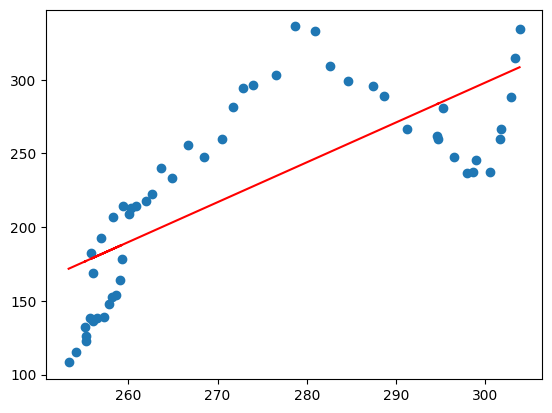

In [146]:
Y_pred = model_MSFT.predict(X)  # make predictions
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red')
plt.show()


## **Same for CPI-Gold price**

In [147]:
correlation, p_value = stats.pearsonr(df_cpi['value'], df_prices['Gold_Price'])

# Set significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis (H0): There is a statistically significant linear relationship between CPI and gold price.")
else:
    print("Fail to reject null hypothesis (H0): Insufficient evidence for a statistically significant linear relationship.")

Reject null hypothesis (H0): There is a statistically significant linear relationship between CPI and gold price.


In [148]:
x = df_cpi[['value']]  # Assuming CPI is the independent variable
Y = df_prices['Gold_Price']  # Dependent variable
Y = Y.fillna(np.mean(Y))
x = x.fillna(x.mean())
x = x.sort_index()

In [149]:
model_Gold = LinearRegression()

In [150]:
# Train the model
model_Gold.fit(x, Y)

# Evaluate the model
r2_scores = model_Gold.score(x, Y)
print(f"R-squared value: {r2_scores}")

R-squared value: 0.33367404418702207


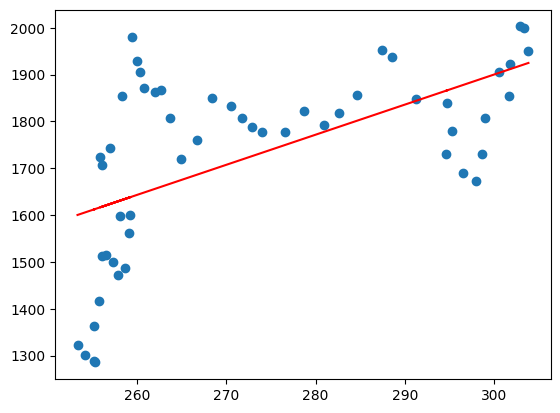

In [151]:
y_pred = model_Gold.predict(x)  # make predictions
plt.scatter(x, Y)
plt.plot(x, y_pred, color='red')
plt.show()


# Machine Learning Algorithms

### Normalize the Data and Split

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [153]:
X = df_cpi[['value']]
y = df_prices['Microsoft_Price'] #we want to predict microsoft stock price

# Normalize the data
scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

## Microsoft Stock Prices

### KNN

In [154]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [155]:
# Initialize and train the kNN model
mse_values = []
k_values = list(range(1, 31))


for k in k_values:
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)

  # Predict on the test set
  knn_predictions = knn.predict(X_test)

  # Evaluate the model
  knn_mse = mean_squared_error(y_test, knn_predictions)
  mse_values.append(knn_mse)
  ##print(f'k Value {k} kNN Mean Squared Error: {knn_mse}')

best_k_index = np.argmin(mse_values)
best_k = k_values[best_k_index]
print(f'The best k value is {best_k} with a MSE of {min(mse_values)}')

The best k value is 5 with a MSE of 0.06719740572964125


In [156]:

knn = KNeighborsRegressor(n_neighbors = best_k)
knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test)

knn_mse = mean_squared_error(y_test, knn_predictions)

rmse = np.sqrt(knn_mse)

print(f"Best K: {k}")
print("RMSE:", rmse)


Best K: 30
RMSE: 0.25922462408043195


In [157]:
r2 = r2_score(y_test, knn_predictions)
print(f'The R² score for the best k value ({best_k}) on the 80-20 split is {r2}')


The R² score for the best k value (5) on the 80-20 split is 0.9159935921659893


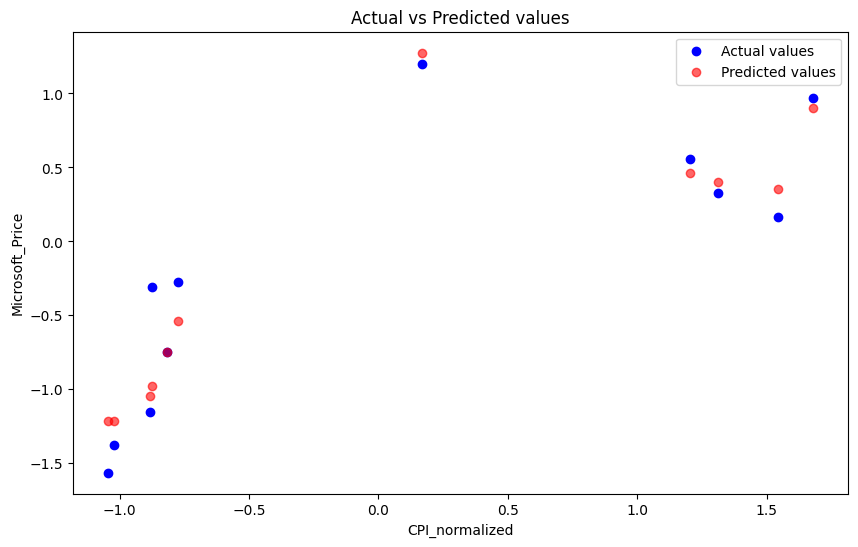

In [158]:
# Creating a scatter plot with the scaled values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.scatter(X_test, knn_predictions, color='red', label='Predicted values', alpha=0.6)
plt.xlabel('CPI_normalized')
plt.ylabel('Microsoft_Price')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()

### Desicion Tree

In [159]:
from sklearn.tree import DecisionTreeRegressor

In [160]:
# Initialize and train the Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f'Decision Tree Mean Squared Error: {dt_mse}')

Decision Tree Mean Squared Error: 0.20819888529204825


### Random Forest

In [161]:
from sklearn.ensemble import RandomForestRegressor

In [162]:
# Initialize and train the Random Forest model

rf_values = []
k_values = list(range(50, 1001, 10))
for k in k_values:
  rf = RandomForestRegressor(n_estimators=k, random_state=42)
  rf.fit(X_train, y_train)

  # Predict on the test set
  rf_predictions = rf.predict(X_test)


  # Evaluate the model

  rf_mse = mean_squared_error(y_test, rf_predictions)
  rf_values.append(rf_mse)
  ##print(f'Random Forest Mean Squared Error: {rf_mse}')

best_rf_index = np.argmin(rf_values)
best_rf = k_values[best_rf_index]
print(f'The best RF value is {best_rf} with Random Forest Mean Squared Error: {min(rf_values)}')

The best RF value is 50 with Random Forest Mean Squared Error: 0.12541247781777304


In [163]:
# Initialize and train the best Random Forest model
best_rf_model = RandomForestRegressor(n_estimators=best_rf, random_state=42)
best_rf_model.fit(X_train, y_train)

# Predict on the test set with the best model
best_rf_predictions = best_rf_model.predict(X_test)

# Calculate the RMSE
best_rf_rmse = np.sqrt(mean_squared_error(y_test, best_rf_predictions))
print(f'The RMSE for the best Random Forest model is {best_rf_rmse}')

# Calculate the R² score
best_rf_r2 = r2_score(y_test, best_rf_predictions)
print(f'The R² score for the best Random Forest model is {best_rf_r2}')

The RMSE for the best Random Forest model is 0.35413624188689447
The R² score for the best Random Forest model is 0.8432163913972888


## Gold Price

### Nomalize the Data and Split

In [164]:
X = df_cpi[["value"]]
y = df_prices["Gold_Price"]
# Normalize the data
scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)


### KNN

In [165]:

mse_values = []

for k in range(1, 31):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)

  # Predict on the test set
  knn_predictions = knn.predict(X_test)

  # Evaluate the model
  knn_mse = mean_squared_error(y_test, knn_predictions)
  mse_values.append(knn_mse)
  ##print(f'k Value {k} kNN Mean Squared Error: {knn_mse}')

best_k = np.argmin(mse_values) +1
print(f'The best k value is {best_k} with a MSE of {min(mse_values)}')

The best k value is 6 with a MSE of 0.41199834068565444


In [166]:
knn = KNeighborsRegressor(n_neighbors = best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(knn_mse)

print(f"Best K: {best_k}")
print("RMSE:", rmse)


Best K: 6
RMSE: 0.6418709688758749


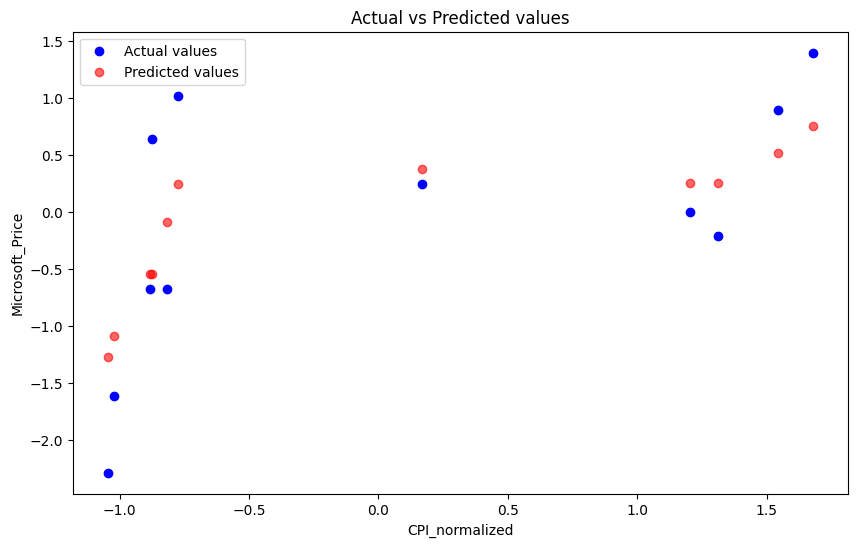

In [167]:
# Creating a scatter plot with the scaled values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values', alpha=0.6)
plt.xlabel('CPI_normalized')
plt.ylabel('Microsoft_Price')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()

### Desicion Tree

In [168]:
# Initialize and train the Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f'Decision Tree Mean Squared Error: {dt_mse}')

Decision Tree Mean Squared Error: 0.9979544275895819


### Random Forest

In [169]:
# Initialize and train the Random Forest model

rf_values = []
k_values = list(range(50, 1001, 10))
for k in k_values:
  rf = RandomForestRegressor(n_estimators=k, random_state=42)
  rf.fit(X_train, y_train)

  # Predict on the test set
  rf_predictions = rf.predict(X_test)


  # Evaluate the model

  rf_mse = mean_squared_error(y_test, rf_predictions)
  rf_values.append(rf_mse)
  ##print(f'Random Forest Mean Squared Error: {rf_mse}')

best_rf_index = np.argmin(rf_values)
best_rf = k_values[best_rf_index]
print(f'The best RF value is {best_rf} with Random Forest Mean Squared Error: {min(rf_values)}')

The best RF value is 90 with Random Forest Mean Squared Error: 0.6303449345273978


In [170]:
# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=best_rf)
rf.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest Mean Squared Error: {rf_mse}')

Random Forest Mean Squared Error: 0.6824104576192305
